###  Problem statement : Predict the stock market prices for 5 stocks

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
train_data = pd.read_csv('new_train.csv', parse_dates = True)
test_data = pd.read_csv('new_test.csv', parse_dates = True)

In [3]:
train_data.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,...,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,...,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
1,2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,...,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2,2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,...,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
3,2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,...,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
4,2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,...,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000


In [4]:
test_data.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,...,Low-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2011-08-04,484.1,488.90,475.00,481.00,1829606,88003633160000,204.90,206.75,199.20,...,990.00,1003.31,2716435,272542181190000,1303.6,1312.8,1281.00,1297.04,1569675,203593328285000
1,2011-08-05,465.0,475.80,457.10,469.56,3156094,148196817355000,195.00,198.00,190.50,...,950.00,961.50,4644498,446567961345000,1245.0,1252.5,1200.00,1229.09,3125692,384176649890000
2,2011-08-08,463.0,480.00,458.05,465.04,4308373,200357861965000,193.90,197.80,189.65,...,933.40,953.24,3450619,328925252905000,1205.2,1265.8,1200.55,1232.93,1660178,204687918340000
3,2011-08-09,450.0,473.55,449.85,460.88,4490924,206978212685000,190.25,202.10,190.10,...,910.45,938.80,5346085,501890604795000,1190.5,1238.3,1180.90,1206.06,3618186,436376441205000
4,2011-08-10,494.8,494.80,473.40,478.06,3267226,156192368225000,202.00,202.85,196.00,...,957.70,964.75,3379659,326053305165000,1242.0,1253.7,1225.30,1242.10,1903396,236421421150000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              299 non-null    object 
 1   Open-Stock-1      299 non-null    float64
 2   High-Stock-1      299 non-null    float64
 3   Low-Stock-1       299 non-null    float64
 4   Close-Stock-1     299 non-null    float64
 5   VWAP-Stock-1      299 non-null    float64
 6   Volume-Stock-1    299 non-null    int64  
 7   Turnover-Stock-1  299 non-null    int64  
 8   Open-Stock-2      299 non-null    float64
 9   High-Stock-2      299 non-null    float64
 10  Low-Stock-2       299 non-null    float64
 11  Close-Stock-2     299 non-null    float64
 12  VWAP-Stock-2      299 non-null    float64
 13  Volume-Stock-2    299 non-null    int64  
 14  Turnover-Stock-2  299 non-null    int64  
 15  Open-Stock-3      299 non-null    float64
 16  High-Stock-3      299 non-null    float64
 1

In [6]:
print(train_data.shape, test_data.shape)

(299, 36) (97, 31)


In [7]:
train_data.describe()

,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,...,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
count,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02,299.000000,299.000000,299.000000,...,299.000000,2.990000e+02,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02
mean,2143.761371,2168.767057,2117.974080,2143.821572,2143.167692,8.887711e+05,1.745160e+14,194.891973,197.075753,192.474916,...,1043.030702,3.684102e+06,3.847515e+14,1334.502508,1352.688629,1314.262542,1333.175753,1333.481204,1.452351e+06,1.929843e+14
std,410.899677,415.209457,405.959346,410.811877,410.279270,6.008330e+05,8.226473e+13,44.718733,45.140896,44.427882,...,94.085013,1.675875e+06,1.817891e+14,100.768718,100.730048,99.079224,99.713093,99.205523,7.033592e+05,9.361878e+13
min,478.700000,487.900000,476.000000,482.050000,481.890000,3.925400e+04,9.406739e+12,152.500000,155.850000,149.000000,...,823.480000,4.235880e+05,5.394387e+13,1156.100000,1194.800000,1150.000000,1160.650000,1169.910000,7.335200e+04,1.138273e+13
25%,2079.200000,2110.100000,2052.775000,2083.000000,2083.265000,5.485695e+05,1.141443e+14,169.125000,170.900000,167.050000,...,1000.215000,2.531522e+06,2.669888e+14,1253.175000,1270.875000,1235.500000,1254.050000,1254.165000,9.689265e+05,1.300165e+14
50%,2230.000000,2264.900000,2205.200000,2232.000000,2226.640000,7.367350e+05,1.584380e+14,176.700000,178.400000,174.000000,...,1051.980000,3.310703e+06,3.370082e+14,1314.000000,1329.500000,1292.000000,1311.500000,1309.890000,1.324664e+06,1.747469e+14
75%,2354.900000,2380.000000,2329.250000,2355.000000,2355.085000,1.011911e+06,2.094621e+14,194.275000,196.075000,193.000000,...,1108.635000,4.321131e+06,4.636005e+14,1386.500000,1402.750000,1370.000000,1384.750000,1385.440000,1.702507e+06,2.268061e+14
max,2566.000000,2583.300000,2553.700000,2565.800000,2570.700000,5.354489e+06,4.793651e+14,309.750000,313.450000,309.000000,...,1273.500000,1.167429e+07,1.278359e+15,1595.000000,1608.500000,1571.100000,1588.750000,1587.400000,5.100637e+06,7.278991e+14


#### Null value check

In [8]:
cols = train_data.columns
import math
train_data[cols].isnull().sum()

Date                0
Open-Stock-1        0
High-Stock-1        0
Low-Stock-1         0
Close-Stock-1       0
VWAP-Stock-1        0
Volume-Stock-1      0
Turnover-Stock-1    0
Open-Stock-2        0
High-Stock-2        0
Low-Stock-2         0
Close-Stock-2       0
VWAP-Stock-2        0
Volume-Stock-2      0
Turnover-Stock-2    0
Open-Stock-3        0
High-Stock-3        0
Low-Stock-3         0
Close-Stock-3       0
VWAP-Stock-3        0
Volume-Stock-3      0
Turnover-Stock-3    0
Open-Stock-4        0
High-Stock-4        0
Low-Stock-4         0
Close-Stock-4       0
VWAP-Stock-4        0
Volume-Stock-4      0
Turnover-Stock-4    0
Open-Stock-5        0
High-Stock-5        0
Low-Stock-5         0
Close-Stock-5       0
VWAP-Stock-5        0
Volume-Stock-5      0
Turnover-Stock-5    0
dtype: int64

#### Outlier check

In [9]:
cols

Index(['Date', 'Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'Close-Stock-1',
       'VWAP-Stock-1', 'Volume-Stock-1', 'Turnover-Stock-1', 'Open-Stock-2',
       'High-Stock-2', 'Low-Stock-2', 'Close-Stock-2', 'VWAP-Stock-2',
       'Volume-Stock-2', 'Turnover-Stock-2', 'Open-Stock-3', 'High-Stock-3',
       'Low-Stock-3', 'Close-Stock-3', 'VWAP-Stock-3', 'Volume-Stock-3',
       'Turnover-Stock-3', 'Open-Stock-4', 'High-Stock-4', 'Low-Stock-4',
       'Close-Stock-4', 'VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4',
       'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'Close-Stock-5',
       'VWAP-Stock-5', 'Volume-Stock-5', 'Turnover-Stock-5'],
      dtype='object')

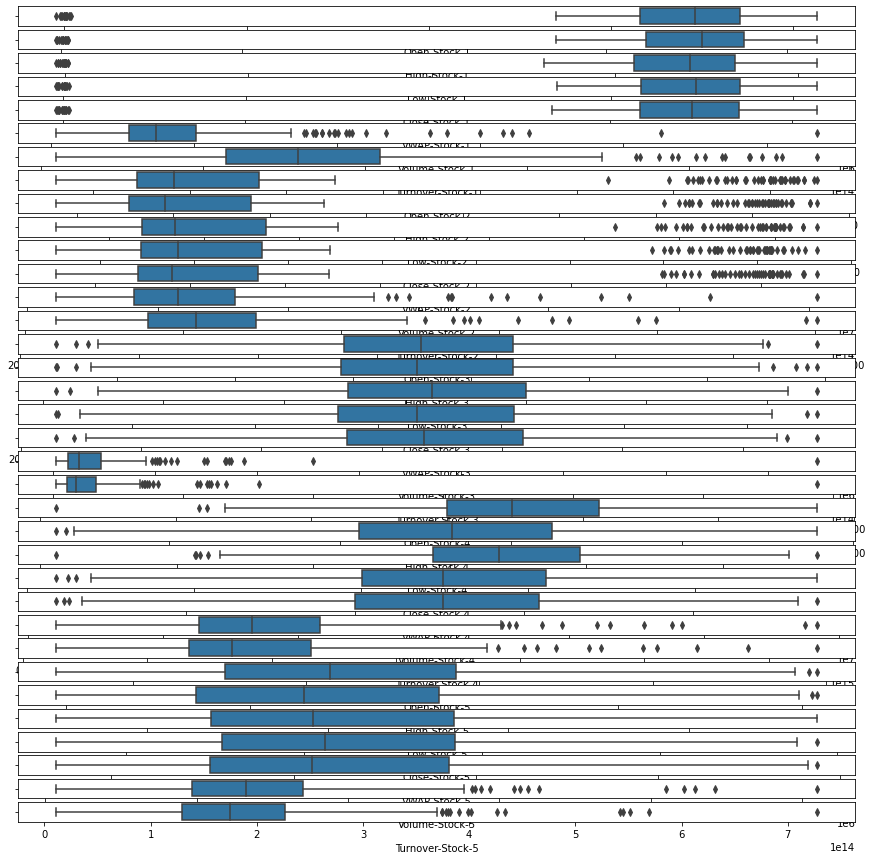

In [10]:
plt.figure(figsize = (15,15))

plt.subplot(35,1,1)
sns.boxplot(x = train_data['Open-Stock-1'])
plt.subplot(35,1,2)
sns.boxplot(x = train_data['High-Stock-1'])
plt.subplot(35,1,3)
sns.boxplot(x = train_data['Low-Stock-1'])
plt.subplot(35,1,4)
sns.boxplot(x = train_data['Close-Stock-1'])
plt.subplot(35,1,5)
sns.boxplot(x = train_data['VWAP-Stock-1'])
plt.subplot(35,1,6)
sns.boxplot(x = train_data['Volume-Stock-1'])
plt.subplot(35,1,7)
sns.boxplot(x = train_data['Turnover-Stock-1'])
plt.subplot(35,1,8)
sns.boxplot(x = train_data['Open-Stock-2'] )
plt.subplot(35,1,9)
sns.boxplot(x = train_data['High-Stock-2'])
plt.subplot(35,1,10)
sns.boxplot(x = train_data['Low-Stock-2'])
plt.subplot(35,1,11)
sns.boxplot(x = train_data['Close-Stock-2'])
plt.subplot(35,1,12)
sns.boxplot(x = train_data['VWAP-Stock-2'])
plt.subplot(35,1,13)
sns.boxplot(x = train_data['Volume-Stock-2'])
plt.subplot(35,1,14)
sns.boxplot(x = train_data['Turnover-Stock-2'])
plt.subplot(35,1,15)
sns.boxplot(x = train_data['Open-Stock-3'] )
plt.subplot(35,1,16)
sns.boxplot(x = train_data['High-Stock-3'])
plt.subplot(35,1,17)
sns.boxplot(x = train_data['Low-Stock-3'])
plt.subplot(35,1,18)
sns.boxplot(x = train_data['Close-Stock-3'])
plt.subplot(35,1,19)
sns.boxplot(x = train_data['VWAP-Stock-3'])
plt.subplot(35,1,20)
sns.boxplot(x = train_data['Volume-Stock-3'])
plt.subplot(35,1,21)
sns.boxplot(x = train_data['Turnover-Stock-3'])
plt.subplot(35,1,22)
sns.boxplot(x = train_data['Open-Stock-4'] )
plt.subplot(35,1,23)
sns.boxplot(x = train_data['High-Stock-4'])
plt.subplot(35,1,24)
sns.boxplot(x = train_data['Low-Stock-4'])
plt.subplot(35,1,25)
sns.boxplot(x = train_data['Close-Stock-4'])
plt.subplot(35,1,26)
sns.boxplot(x = train_data['VWAP-Stock-4'])
plt.subplot(35,1,27)
sns.boxplot(x = train_data['Volume-Stock-4'])
plt.subplot(35,1,28)
sns.boxplot(x = train_data['Turnover-Stock-4'])
plt.subplot(35,1,29)
sns.boxplot(x = train_data['Open-Stock-5'] )
plt.subplot(35,1,30)
sns.boxplot(x = train_data['High-Stock-5'])
plt.subplot(35,1,31)
sns.boxplot(x = train_data['Low-Stock-5'])
plt.subplot(35,1,32)
sns.boxplot(x = train_data['Close-Stock-5'])
plt.subplot(35,1,33)
sns.boxplot(x = train_data['VWAP-Stock-5'])
plt.subplot(35,1,34)
sns.boxplot(x = train_data['Volume-Stock-5'])
plt.subplot(35,1,35)
sns.boxplot(x = train_data['Turnover-Stock-5'])




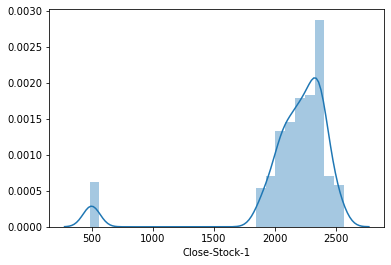

In [11]:
sns.distplot(train_data['Close-Stock-1'])
plt.show()

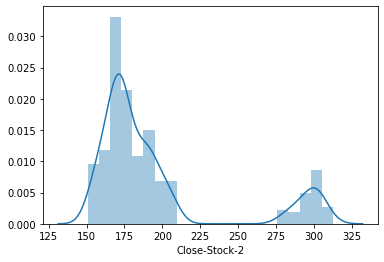

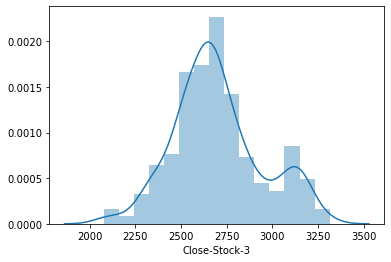

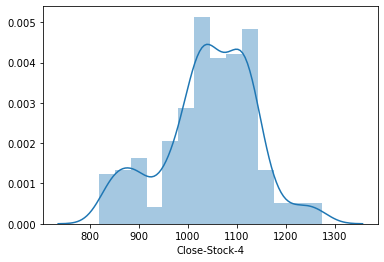

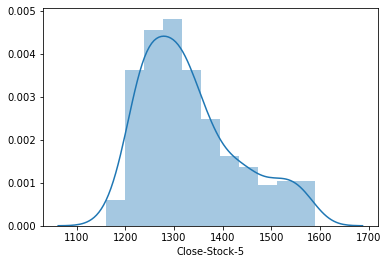

In [12]:
sns.distplot(train_data['Close-Stock-2'])
plt.show()
sns.distplot(train_data['Close-Stock-3'])
plt.show()
sns.distplot(train_data['Close-Stock-4'])
plt.show()
sns.distplot(train_data['Close-Stock-5'])
plt.show()

In [13]:
test_cols = test_data.columns
test_cols

Index(['Date', 'Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'VWAP-Stock-1',
       'Volume-Stock-1', 'Turnover-Stock-1', 'Open-Stock-2', 'High-Stock-2',
       'Low-Stock-2', 'VWAP-Stock-2', 'Volume-Stock-2', 'Turnover-Stock-2',
       'Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'VWAP-Stock-3',
       'Volume-Stock-3', 'Turnover-Stock-3', 'Open-Stock-4', 'High-Stock-4',
       'Low-Stock-4', 'VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4',
       'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'VWAP-Stock-5',
       'Volume-Stock-5', 'Turnover-Stock-5'],
      dtype='object')

In [14]:
features = train_data.drop(['Date','Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ], axis = 1)
target = train_data[['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ]]
test_features = test_data.drop('Date', axis = 1)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_trained_features = scaler.fit_transform(features)
scaled_test_features = scaler.fit_transform(test_features)

In [16]:
scaled_train_data = pd.DataFrame(scaled_trained_features, columns = features.columns)
scaled_testing_data = pd.DataFrame(scaled_test_features, columns = test_features.columns )


In [17]:
scaled_testing_data.head()

,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,VWAP-Stock-2,...,Low-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,1.089541,1.078021,1.044954,1.035975,-0.786650,-0.759178,0.592791,0.557687,0.052186,0.285729,...,2.172978,2.164287,-0.703987,-0.582065,2.461766,2.346542,2.464607,2.404587,-0.950787,-0.479984
1,0.112629,0.370952,0.141481,0.433626,-0.228659,-0.196709,-1.125981,-1.056971,-1.398884,-1.159132,...,1.665724,1.634833,-0.124316,0.149321,1.867043,1.746143,1.645263,1.725585,1.001147,1.656767
2,0.010335,0.597646,0.189431,0.195635,0.256050,0.290703,-1.316956,-1.093877,-1.540655,-1.153794,...,1.455213,1.530234,-0.483255,-0.345102,1.463119,1.878569,1.650826,1.763956,-0.837256,-0.467033
3,-0.654579,0.249508,-0.224450,-0.023401,0.332840,0.352567,-1.950644,-0.300388,-1.465600,-0.669801,...,1.164176,1.347375,0.086616,0.381828,1.313931,1.604755,1.452060,1.495453,1.618952,2.274421
4,1.636816,1.396473,0.964196,0.881176,-0.181911,-0.121996,0.089312,-0.161989,-0.481541,-0.410011,...,1.763370,1.675989,-0.504589,-0.357172,1.836597,1.758091,1.901182,1.855589,-0.532153,-0.091546


In [18]:
X = features
y = target
print(X.shape, y.shape)

(299, 30) (299, 5)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(239, 30) (60, 30) (239, 5) (60, 5)


In [20]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
training_linear_model = linear_model.fit(X_train, y_train)
training_linear_model

LinearRegression()

In [21]:
linear_preds = linear_model.predict(X_test)

In [22]:
mean_squared_error(y_test,linear_preds)

129.61590777923658

In [23]:
from math import sqrt
print('rmse: ', sqrt(mean_squared_error(y_test,linear_preds)))

rmse:  11.384898233152397


In [24]:
linear_preds

array([[1917.6303458 ,  303.09390382, 2336.64710383,  840.99246543,
        1240.11710456],
       [2130.74703163,  159.9239056 , 2695.69843972,  965.76058199,
        1327.42461349],
       [2323.85762868,  171.27390641, 2624.90880646, 1123.76828878,
        1464.17174501],
       [2021.2716362 ,  162.54945926, 2557.1859397 , 1014.62329873,
        1249.06995484],
       [ 510.69155531,  201.57079808, 3154.30066166, 1067.20895452,
        1273.62883917],
       [2172.99041021,  166.71078668, 2701.90694309, 1077.26101686,
        1293.043841  ],
       [2199.33517479,  171.809562  , 2525.99602554, 1015.15506803,
        1277.06579267],
       [2355.57733744,  171.13533547, 2703.11989918, 1169.37617019,
        1420.06649442],
       [ 496.4620894 ,  202.16880048, 3120.71207708, 1044.36807912,
        1315.83469689],
       [2570.17401889,  201.78522008, 3203.47861528, 1067.636438  ,
        1313.04245745],
       [2278.97649968,  190.28551036, 2789.84933867, 1085.40642761,
        1251

In [25]:
linear_test_preds = linear_model.predict(test_features)

In [26]:
a = list(linear_test_preds)
pred = pd.DataFrame(a, columns = ['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ])
pred.shape

(97, 5)

In [27]:
linear_predictions_output = test_data.drop(['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'VWAP-Stock-1',
       'Volume-Stock-1', 'Turnover-Stock-1', 'Open-Stock-2', 'High-Stock-2',
       'Low-Stock-2', 'VWAP-Stock-2', 'Volume-Stock-2', 'Turnover-Stock-2',
       'Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'VWAP-Stock-3',
       'Volume-Stock-3', 'Turnover-Stock-3', 'Open-Stock-4', 'High-Stock-4',
       'Low-Stock-4', 'VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4',
       'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'VWAP-Stock-5',
       'Volume-Stock-5', 'Turnover-Stock-5'], axis = 1)

In [28]:
linear_predictions_output[['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ]] = pred

In [29]:
linear_predictions_output.head()

,Date,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,2011-08-04,476.606020,202.495063,3088.469445,1001.427003,1293.786664
1,2011-08-05,461.100609,194.934342,3060.881584,954.275758,1222.220061
2,2011-08-08,465.884860,195.199907,3082.936690,959.511985,1242.947597
3,2011-08-09,460.439802,198.878453,3122.397681,941.575830,1215.935756
4,2011-08-10,468.004345,198.581985,3174.588211,961.284944,1238.482159


In [30]:
linear_predictions_output.to_csv("C:\\Users\\dines\\OneDrive\\Documents\\data projects\\output.csv", index = False)

In [31]:
#modeling scaled data
scaled_x = scaled_train_data
y_for_scaled = target

scaled_x_train, scaled_x_test, y_for_scaled_train, y_for_scaled_test = train_test_split(scaled_x, y_for_scaled, test_size = 0.20, random_state = 20)

In [32]:
reg_for_scaled = LinearRegression()
reg_for_scaled

LinearRegression()

In [33]:
reg_for_scaled.fit(scaled_x_train, y_for_scaled_train)

LinearRegression()

In [34]:
preds_scaled_linear = reg_for_scaled.predict(scaled_x_test)
preds_scaled_linear

array([[2303.71317679,  178.88675413, 2520.87809765, 1104.09602539,
        1418.35765591],
       [2349.77761631,  181.97559504, 2540.04227659, 1104.17728515,
        1443.13099741],
       [1988.74627929,  301.64817106, 2362.09380882,  876.50001342,
        1270.34873385],
       [2336.88274283,  174.89456687, 2654.38229266, 1204.43616325,
        1488.54867044],
       [2384.09573158,  169.9190311 , 2663.99187021, 1179.99531034,
        1404.55173215],
       [ 493.53903888,  200.08378896, 3129.47601173, 1028.15074588,
        1299.22069023],
       [2237.35832973,  162.5829548 , 2810.37738393, 1048.49008089,
        1380.75772209],
       [2235.34726429,  185.13097814, 2675.08920847, 1065.04284456,
        1231.29455254],
       [2194.70379788,  160.51561625, 2771.89543637,  987.88813845,
        1369.10510777],
       [2364.99842151,  168.44092406, 2611.03844599, 1097.94573873,
        1466.2314984 ],
       [2197.44355452,  170.45314453, 2500.60796628, 1010.35103117,
        1278

In [35]:
print('rmse: ', sqrt(mean_squared_error(preds_scaled_linear, y_for_scaled_test)))

rmse:  11.805233876561855


In [36]:
b = list(linear_test_preds)
scaled_pred = pd.DataFrame(b, columns = ['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ])
scaled_pred.shape

scaled_linear_predictions_output = test_data.drop(['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'VWAP-Stock-1',
       'Volume-Stock-1', 'Turnover-Stock-1', 'Open-Stock-2', 'High-Stock-2',
       'Low-Stock-2', 'VWAP-Stock-2', 'Volume-Stock-2', 'Turnover-Stock-2',
       'Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'VWAP-Stock-3',
       'Volume-Stock-3', 'Turnover-Stock-3', 'Open-Stock-4', 'High-Stock-4',
       'Low-Stock-4', 'VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4',
       'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'VWAP-Stock-5',
       'Volume-Stock-5', 'Turnover-Stock-5'], axis = 1)

scaled_linear_predictions_output[['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ]] = scaled_pred


In [37]:
scaled_linear_predictions_output.head()

,Date,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,2011-08-04,476.606020,202.495063,3088.469445,1001.427003,1293.786664
1,2011-08-05,461.100609,194.934342,3060.881584,954.275758,1222.220061
2,2011-08-08,465.884860,195.199907,3082.936690,959.511985,1242.947597
3,2011-08-09,460.439802,198.878453,3122.397681,941.575830,1215.935756
4,2011-08-10,468.004345,198.581985,3174.588211,961.284944,1238.482159


In [38]:
scaled_linear_predictions_output.to_csv('C:\\Users\\dines\\OneDrive\\Documents\\data projects\\output.csv', index = False)

### Decision tree model

In [39]:
DT_X = features
DT_y = target
print(DT_X.shape, DT_y.shape)

(299, 30) (299, 5)


In [40]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT

DecisionTreeRegressor()

In [41]:
DT_x_train, DT_x_test, DT_y_train, DT_y_test = train_test_split(DT_X, DT_y, test_size = 0.20, random_state = 100)


In [42]:
DT.fit(DT_x_train, DT_y_train)

DecisionTreeRegressor()

In [43]:
DT_predictions = DT.predict(DT_x_test)
DT_test_preds = DT.predict(test_features)

In [44]:
print('rmse: ', sqrt(mean_squared_error(DT_predictions, DT_y_test)))

rmse:  34.458307295435546


In [45]:
c = list(DT_test_preds)
DT_pred = pd.DataFrame(c, columns = ['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ])


DT_predictions_output = test_data.drop(['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'VWAP-Stock-1',
       'Volume-Stock-1', 'Turnover-Stock-1', 'Open-Stock-2', 'High-Stock-2',
       'Low-Stock-2', 'VWAP-Stock-2', 'Volume-Stock-2', 'Turnover-Stock-2',
       'Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'VWAP-Stock-3',
       'Volume-Stock-3', 'Turnover-Stock-3', 'Open-Stock-4', 'High-Stock-4',
       'Low-Stock-4', 'VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4',
       'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'VWAP-Stock-5',
       'Volume-Stock-5', 'Turnover-Stock-5'], axis = 1)

DT_predictions_output[['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ]] = DT_pred


In [46]:
DT_predictions_output.to_csv('C:\\Users\\dines\\OneDrive\\Documents\\data projects\\output.csv', index = False)

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [48]:
rf.fit(DT_x_train, DT_y_train)

RandomForestRegressor()

In [49]:
rf_preds = rf.predict(DT_x_test)

In [50]:
print('rmse: ', sqrt(mean_squared_error(rf_preds, DT_y_test)))

rmse:  22.452190532922792


In [51]:
rf_test_preds = rf.predict(test_features)

In [52]:
d = list(rf_test_preds)
rf_pred = pd.DataFrame(d, columns = ['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ])
rf_pred.shape

rf_predictions_output = test_data.drop(['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'VWAP-Stock-1',
       'Volume-Stock-1', 'Turnover-Stock-1', 'Open-Stock-2', 'High-Stock-2',
       'Low-Stock-2', 'VWAP-Stock-2', 'Volume-Stock-2', 'Turnover-Stock-2',
       'Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'VWAP-Stock-3',
       'Volume-Stock-3', 'Turnover-Stock-3', 'Open-Stock-4', 'High-Stock-4',
       'Low-Stock-4', 'VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4',
       'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'VWAP-Stock-5',
       'Volume-Stock-5', 'Turnover-Stock-5'], axis = 1)

rf_predictions_output[['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ]] = rf_pred


In [53]:
rf_predictions_output.to_csv('C:\\Users\\dines\\OneDrive\\Documents\\data projects\\output.csv', index = False)

### Feature selection

In [54]:
feature_importance = rf.feature_importances_*100
feature_importance

array([19.16717003, 14.75700369, 23.25343697, 21.85873356,  0.57791478,
        0.03153341,  0.12831158,  0.15869937,  0.21559507,  0.17088516,
        0.03493698,  0.04236606,  0.68996501,  3.22226877,  1.95569416,
        7.67273887,  0.03560355,  0.02931519,  0.43448295,  0.54360391,
        0.87338152,  0.53188807,  0.03518272,  0.04763111,  0.12222615,
        1.62530676,  0.27121387,  1.43909054,  0.04095431,  0.0328659 ])

Text(0.5, 0, 'feature importance')

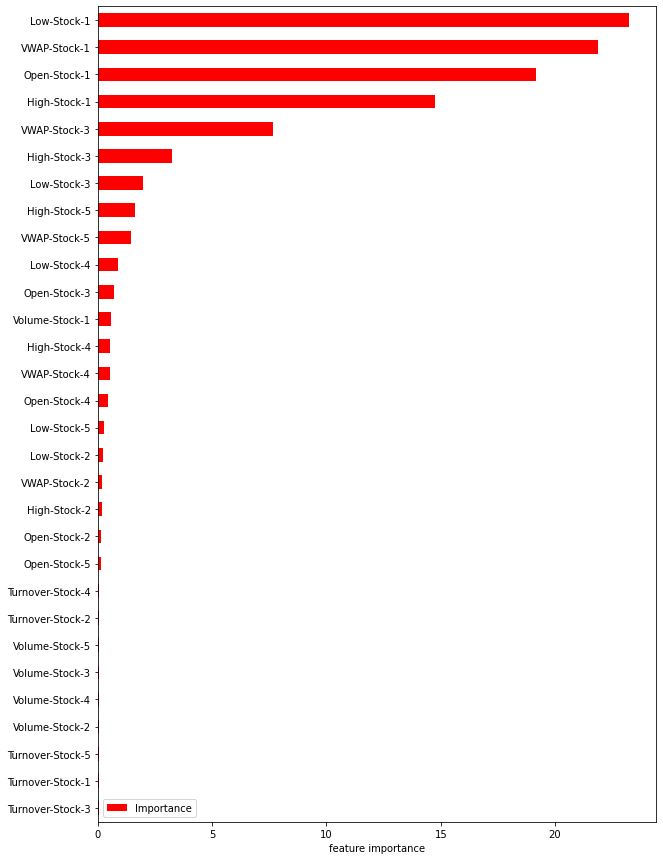

In [55]:
importance = pd.DataFrame({'Importance' : feature_importance}, index = DT_x_train.columns )
importance.sort_values('Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r', figsize = (10,15))

plt.xlabel('feature importance')

In [56]:
sig_features = ['VWAP-Stock-1', 'Low-Stock-1', 'High-Stock-1', 'Open-Stock-1', 'VWAP-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'High-Stock-5', 'VWAP-Stock-5', 'Open-Stock-3', 'Low-Stock-4', 'Volume-Stock-1', 'High-Stock-4', 'Open-Stock-4', 'VWAP-Stock-4', 'Low-Stock-5', 'Open-Stock-5', 'VWAP-Stock-2', 'High-Stock-2', 'Open-Stock-2', 'Low-Stock-2' ]

In [57]:
imp_x = features[sig_features]
y = target

In [58]:
x_train, x_test, y_train, y_test = train_test_split(imp_x, y, test_size = 0.20, random_state = 41)

In [59]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [60]:
imp_pred = linear_model.predict(x_test)

In [61]:
mean_squared_error(imp_pred,y_test)

91.7696964192893

In [62]:
sqrt(mean_squared_error(imp_pred,y_test))

9.57965011987856

In [63]:
imp_test_features = test_features[sig_features]
imp_pred = linear_model.predict(imp_test_features)

In [64]:
e = list(imp_pred)
imp_preds = pd.DataFrame(e, columns = ['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ])


imp_predictions_output = test_data.drop(['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'VWAP-Stock-1',
       'Volume-Stock-1', 'Turnover-Stock-1', 'Open-Stock-2', 'High-Stock-2',
       'Low-Stock-2', 'VWAP-Stock-2', 'Volume-Stock-2', 'Turnover-Stock-2',
       'Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'VWAP-Stock-3',
       'Volume-Stock-3', 'Turnover-Stock-3', 'Open-Stock-4', 'High-Stock-4',
       'Low-Stock-4', 'VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4',
       'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'VWAP-Stock-5',
       'Volume-Stock-5', 'Turnover-Stock-5'], axis = 1)

imp_predictions_output[['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ]] = imp_preds


In [65]:
imp_predictions_output.to_csv('C:\\Users\\dines\\OneDrive\\Documents\\data projects\\output.csv', index = False)

In [66]:
sig_features2 = ['VWAP-Stock-1', 'Low-Stock-1', 'High-Stock-1', 'Open-Stock-1', 'VWAP-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'High-Stock-5', 'VWAP-Stock-5', 'Open-Stock-3', 'Low-Stock-4', 'Volume-Stock-1', 'High-Stock-4', 'Open-Stock-4', 'VWAP-Stock-4', 'Low-Stock-5', 'Open-Stock-5', 'VWAP-Stock-2',  'High-Stock-2' ]

In [88]:
imp_x.shape

(299, 21)

In [67]:
imp2_x = features[sig_features2]
y2 = target

x2_train, x2_test, y2_train, y2_test = train_test_split(imp2_x, y2, test_size = 0.20, random_state = 32)

In [68]:
linear_model.fit(x2_train, y2_train)

LinearRegression()

In [69]:
imp2_pred = linear_model.predict(x2_test)
mean_squared_error(imp2_pred, y2_test)

93.8894598020482

In [70]:
sqrt(mean_squared_error(imp2_pred, y2_test))

9.689657362468923

In [81]:
combined = pd.concat([imp_x, y], axis = 1)
combined.head()

,VWAP-Stock-1,Low-Stock-1,High-Stock-1,Open-Stock-1,VWAP-Stock-3,High-Stock-3,Low-Stock-3,High-Stock-5,VWAP-Stock-5,Open-Stock-3,...,Open-Stock-5,VWAP-Stock-2,High-Stock-2,Open-Stock-2,Low-Stock-2,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,1855.75,1838.00,1890.00,1889.7,2088.95,2097.8,2045.00,1238.00,1197.29,2095.00,...,1235.0,283.72,285.95,285.40,281.50,1855.10,283.00,2077.25,837.95,1181.70
1,1842.82,1828.00,1862.75,1848.0,2059.52,2098.0,2023.00,1206.95,1189.87,2061.45,...,1195.0,281.05,284.80,284.00,279.25,1853.05,281.30,2079.85,842.30,1201.15
2,1893.91,1864.10,1910.00,1864.1,2107.84,2131.5,2091.05,1248.00,1231.63,2131.50,...,1211.0,285.34,286.85,283.00,282.50,1905.60,285.50,2114.90,854.10,1242.30
3,1889.21,1880.10,1909.80,1906.0,2145.36,2156.0,2095.50,1258.00,1249.72,2114.90,...,1240.0,289.81,291.80,288.85,277.00,1885.70,290.85,2146.75,865.85,1245.45
4,1873.32,1808.35,1894.85,1867.0,2180.52,2209.0,2112.00,1225.00,1209.27,2132.35,...,1218.6,287.01,289.10,285.00,285.00,1876.65,287.70,2185.25,841.95,1214.80


In [83]:
## outlier detection using z score
from scipy import stats
z = np.abs(stats.zscore(combined))
z

array([[0.70171601, 0.69081657, 0.67251454, ..., 2.56386858, 2.17722854,
        1.5216627 ],
       [0.73328396, 0.71549087, 0.73825409, ..., 2.55313834, 2.13093562,
        1.32627605],
       [0.60855027, 0.62641663, 0.62426532, ..., 2.40848647, 2.00535941,
        0.91290019],
       ...,
       [4.03822641, 4.03048366, 4.03560521, ..., 1.52435224, 0.029933  ,
        0.19914618],
       [4.05248448, 4.0415871 , 4.05502551, ..., 1.4595581 , 0.22175153,
        0.09668121],
       [4.05592692, 4.05145682, 4.05140682, ..., 1.34008103, 0.43193205,
        0.32171745]])

In [84]:
len(np.where(z > 3)[0])

84

In [158]:
outliers = list(set(np.where(z > 3)[0]))
new_df = combined.drop(outliers, axis = 0).reset_index(drop = True)
new_df.head()

,VWAP-Stock-1,Low-Stock-1,High-Stock-1,Open-Stock-1,VWAP-Stock-3,High-Stock-3,Low-Stock-3,High-Stock-5,VWAP-Stock-5,Open-Stock-3,...,Open-Stock-5,VWAP-Stock-2,High-Stock-2,Open-Stock-2,Low-Stock-2,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,1855.75,1838.0,1890.00,1889.7,2088.95,2097.8,2045.00,1238.00,1197.29,2095.00,...,1235.0,283.72,285.95,285.40,281.50,1855.10,283.00,2077.25,837.95,1181.70
1,1842.82,1828.0,1862.75,1848.0,2059.52,2098.0,2023.00,1206.95,1189.87,2061.45,...,1195.0,281.05,284.80,284.00,279.25,1853.05,281.30,2079.85,842.30,1201.15
2,1893.91,1864.1,1910.00,1864.1,2107.84,2131.5,2091.05,1248.00,1231.63,2131.50,...,1211.0,285.34,286.85,283.00,282.50,1905.60,285.50,2114.90,854.10,1242.30
3,1889.21,1880.1,1909.80,1906.0,2145.36,2156.0,2095.50,1258.00,1249.72,2114.90,...,1240.0,289.81,291.80,288.85,277.00,1885.70,290.85,2146.75,865.85,1245.45
4,1877.11,1853.0,1897.00,1880.0,2223.10,2244.0,2189.00,1242.60,1229.32,2189.00,...,1214.4,290.00,292.60,290.70,286.55,1862.70,289.70,2238.00,817.50,1226.20


In [159]:
new_features = new_df.drop(['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ], axis = 1)
new_target = new_df[['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ]]

In [160]:
new_features.shape, new_target.shape

((283, 21), (283, 5))

In [161]:
new_xtrain, new_xtest, new_ytrain, new_ytest = train_test_split(new_features, new_target, test_size = 0.20, random_state = 21)


In [162]:
linear_model.fit(new_xtrain, new_ytrain)

LinearRegression()

In [163]:
new_pred = linear_model.predict(new_xtest)

In [164]:
print('mse: ', mean_squared_error(new_pred, new_ytest))
print('rmse: ', sqrt(mean_squared_error(new_pred, new_ytest)))

mse:  77.11876824370619
rmse:  8.78172922855779


In [165]:
nonO_preds = linear_model.predict(imp_test_features)

In [167]:
f = list(nonO_preds)
nonO_imp_preds = pd.DataFrame(f, columns = ['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ])


nonO_imp_predictions_output = test_data.drop(['Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'VWAP-Stock-1',
       'Volume-Stock-1', 'Turnover-Stock-1', 'Open-Stock-2', 'High-Stock-2',
       'Low-Stock-2', 'VWAP-Stock-2', 'Volume-Stock-2', 'Turnover-Stock-2',
       'Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'VWAP-Stock-3',
       'Volume-Stock-3', 'Turnover-Stock-3', 'Open-Stock-4', 'High-Stock-4',
       'Low-Stock-4', 'VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4',
       'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'VWAP-Stock-5',
       'Volume-Stock-5', 'Turnover-Stock-5'], axis = 1)

nonO_imp_predictions_output[['Close-Stock-1','Close-Stock-2','Close-Stock-3','Close-Stock-4','Close-Stock-5' ]] = nonO_imp_preds


In [168]:
nonO_imp_predictions_output.to_csv('C:\\Users\\dines\\OneDrive\\Documents\\data projects\\output.csv', index = False)

In [155]:
RMSE = []
for i in range(1, 100):
    new_xtrain, new_xtest, new_ytrain, new_ytest = train_test_split(new_features, new_target, test_size = 0.20, random_state = i)
    linear_model.fit(new_xtrain, new_ytrain)
    new_preds = linear_model.predict(new_xtest)
    RMSE.append(sqrt(mean_squared_error(new_pred, new_ytest)))

In [157]:
df_rmse = pd.DataFrame({'random_state' : range(1,100), 'RMSE' : RMSE})
df_rmse.sort_values('RMSE', ascending = True)

,random_state,RMSE
20,21,8.781729
30,31,160.015294
28,29,169.078661
35,36,170.000475
5,6,174.165213
...,...,...
51,52,216.997441
0,1,217.201165
24,25,218.630631
58,59,220.015106


In [ ]:
linear